# **Title: Heart Disease Prediction**

`Author:`[Najeeb ullah](https://github.com/najeebjony)\
`Date:` 04.jan.2024\
`Dataset"` [Heart Disease UCi](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex `(Male/Female)
* `cp` chest pain type typical 
1. typical angina
2. atypical angina
3. non-anginal
4. asymptomati

* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D

# Aims and Objective:

we will fill this after some exploratory Data Analysis (EDA).

# import libraries 

Let's Start the project by impoprtig all the libraries that we will need in the project.

In [112]:
# import libraries 

# 1. to handel the data 
import pandas as pd
import numpy as np

# to visualiztion the dataset 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

# to preprocess the data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor , AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error , r2_score, mean_squared_error

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Load the dataset 

In [113]:
# laod the dataset from csv file placed locally in our pc 
df = pd.read_csv('heart_disease_uci.csv')   

# print the first 5 rows of the dataframe
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## **Exploratory Data Analysis (EDA)**

#### Explore each Columns 

In [114]:
# ecploring the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [115]:
# check the the dataset shape 
df.shape

(920, 16)

In [116]:
# id column 
df['id'].min(), df['id'].max()

(1, 920)

In [117]:
# let's summarise the age column
df['age'].describe().T

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [118]:
# Age column 
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

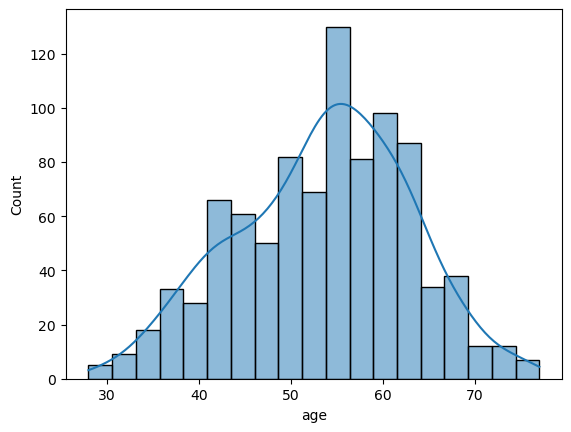

In [119]:
# draw a histogram to see the distribution of age column 
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


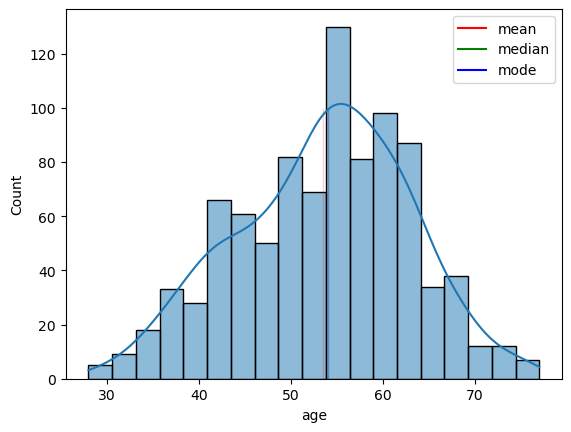

In [120]:
# plot the mean, median and mode of age column using sns

sns.histplot(df['age'], kde=True)

mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode()[0]

sns.lineplot(x=[mean, mean], y=[0, 100], color='red', label='mean')
sns.lineplot(x=[median, median], y=[0, 100], color='green', label='median')
sns.lineplot(x=[mode, mode], y=[0, 100], color='blue', label='mode')

# both code are working same 

# plt.axline(df['age'].mean(), color='red')
# plt.axline(df['age'].median(), color='green')
# plt.axline(df['age'].mode()[0], color='blue')

# print the values of mean median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

let's explore the gender based distribution of the dataset for age column.

In [121]:
# plot the histogram of age colum using plotly coloring this by sex. size 

import plotly.express as px

fig = px.histogram(df, x="age", color="sex", marginal="box", hover_data=df.columns)

# fig = px.histogram(df, x="age", color="sex")
fig.show()




In [122]:
# find the values count of age column grouping by sex column 
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [123]:
df.groupby('sex')['age'].value_counts().sum()

920

In [124]:
# find out the percentage of sex column 
df['sex'].value_counts(normalize=True)

sex
Male      0.78913
Female    0.21087
Name: proportion, dtype: float64

In [125]:
# calculate the percentages of male and female value counts in the dataset

male_count = 194
female_count = 726
total_count = male_count + female_count

# calculate percentages 
percentage_male = (male_count / total_count) * 100
percentage_female = (female_count / total_count) * 100

#Display the result 
print(f"The percentage of males is {round(percentage_male, 2)}%")
print(f"The percentage of females is {round(percentage_female, 2)}%")

#difference 
diff = abs(percentage_male - percentage_female)
print(f"The difference between male and female {round(diff, 2)}%")


The percentage of males is 21.09%
The percentage of females is 78.91%
The difference between male and female 57.83%


In [126]:
# find the values count of age column grouping by sex column 
df['age'].value_counts()


# groupby method can be used to perform this task. It is a powerful data manipulation tool
# Use the groupby method to group the data by the 'sex' column and perform a count on the 'age' column
age_count_by_sex = df.groupby('sex')['age'].count()

# Print the result
print(age_count_by_sex)

sex
Female    194
Male      726
Name: age, dtype: int64


In [127]:
# let's deal with dataset column 
# find the unique values in dataset column 
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [128]:
# fine unique values count in dataset column 
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [129]:
# plot the counplot of dataset column 
# sns.countplot(data=df, x='dataset', hue='sex')

fig=px.bar(df, x='dataset', color='sex')
fig.show()

# print the values counts of dataset column grouped by sex 
df.groupby('sex')["dataset"].value_counts()


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [130]:
# make a plot of age column using plotly and coloring the by dataset column 
fig = px.histogram(df, x="age", color="dataset", marginal="box", hover_data=df.columns)
fig.show()

# find the mean of age column grouped by dataset column

In [131]:
print("Mean of Data Set:", df.groupby('dataset')['age'].mean())
print("----------------------------------------------------------")
print("Median of Data Set:", df.groupby('dataset')['age'].median())
print("----------------------------------------------------------")
print("Mode of Data Set:", df.groupby('dataset')['age'].agg(pd.Series.mode))
print("----------------------------------------------------------")


Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
----------------------------------------------------------


In [132]:
mean_age = df.groupby('dataset')['age'].mean()
percentage_diff = (mean_age[0] - mean_age[1]) / mean_age[1]
print(f"The percentage difference in Age column for each Dataset group is {round(percentage_diff * 100, 2)}%")


The percentage difference in Age column for each Dataset group is 13.48%


### Let's explore cp (Chest Pain) column:



In [133]:
# values counts of cp column 

df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

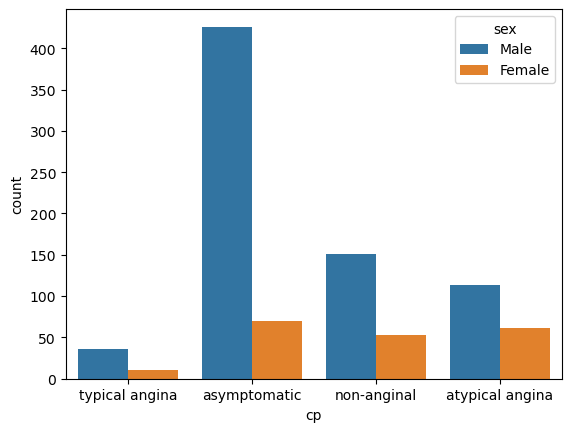

In [134]:

# Plot the sex column grouped by cp column
sns.countplot(data=df, x='cp', hue='sex')
plt.show()

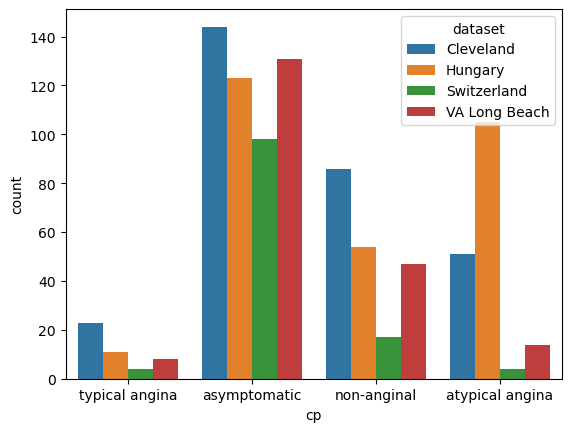

In [135]:
# count plot of cp column by dataset colum 
sns.countplot(data=df, x='cp', hue='dataset')
plt.show()

In [136]:
# draw the plot of age colum grouped by cp column using plotly
fig = px.histogram(df, x="age", color="cp", marginal="box", hover_data=df.columns)
fig.show()

### Let's explore the trestbps(resting blood presure) column:

The normal resting blood presure is 120/80 mm Hg.

`write here, what will happen if the blood presure is high or low and then you can bin the data based on these values. `

In [137]:
# find the values counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

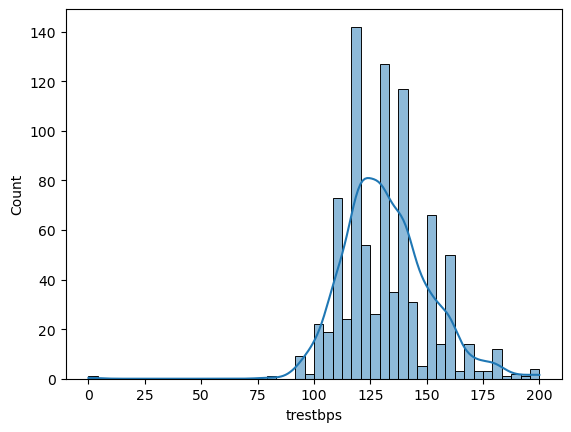

In [138]:
# create a histplot of trestbps column 
sns.histplot(df['trestbps'], kde=True)

<span style="color:yellow; font-weight:bold; font-size:250%;">Dealing with missing values
 </span>


 we are going to make a function to deal with missing values


In [139]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.to_list()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [140]:
categorical_col = df.select_dtypes(include=['object']).columns.to_list()
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(f"categorical_columns: {categorical_col}")
print(f"numerical_columns: {numerical_col}")

categorical_columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [141]:
categorical_col= ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex','num']
bool_cols = ['fbs', 'exang']
numeric_col = ['oldpeak','thalch','chol','trestbps','age']

In [142]:
#  define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [143]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [144]:
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_col:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_col:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.450982658959537 

RMSE = 17.31593652689534 

R2 = 0.06379756235777989 

Missing Values chol : 3.26%


MAE = 45.35112359550562 

RMSE = 63.814111679456936 

R2 = 0.6774091078561438 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values thalch : 5.98%
MAE = 16.867341040462428 

RMSE = 21.991965992336667 

R2 = 0.2967375584798633 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 81.5 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.560906976744186 

RMSE = 0.7841136159962392 

R2 = 0.4142450915814969 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.85 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 67.74 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [145]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

<span style="color:yellow; font-weight:bold; font-size:250%;">Dealing with Outliers
 </span>

IndexError: list index out of range

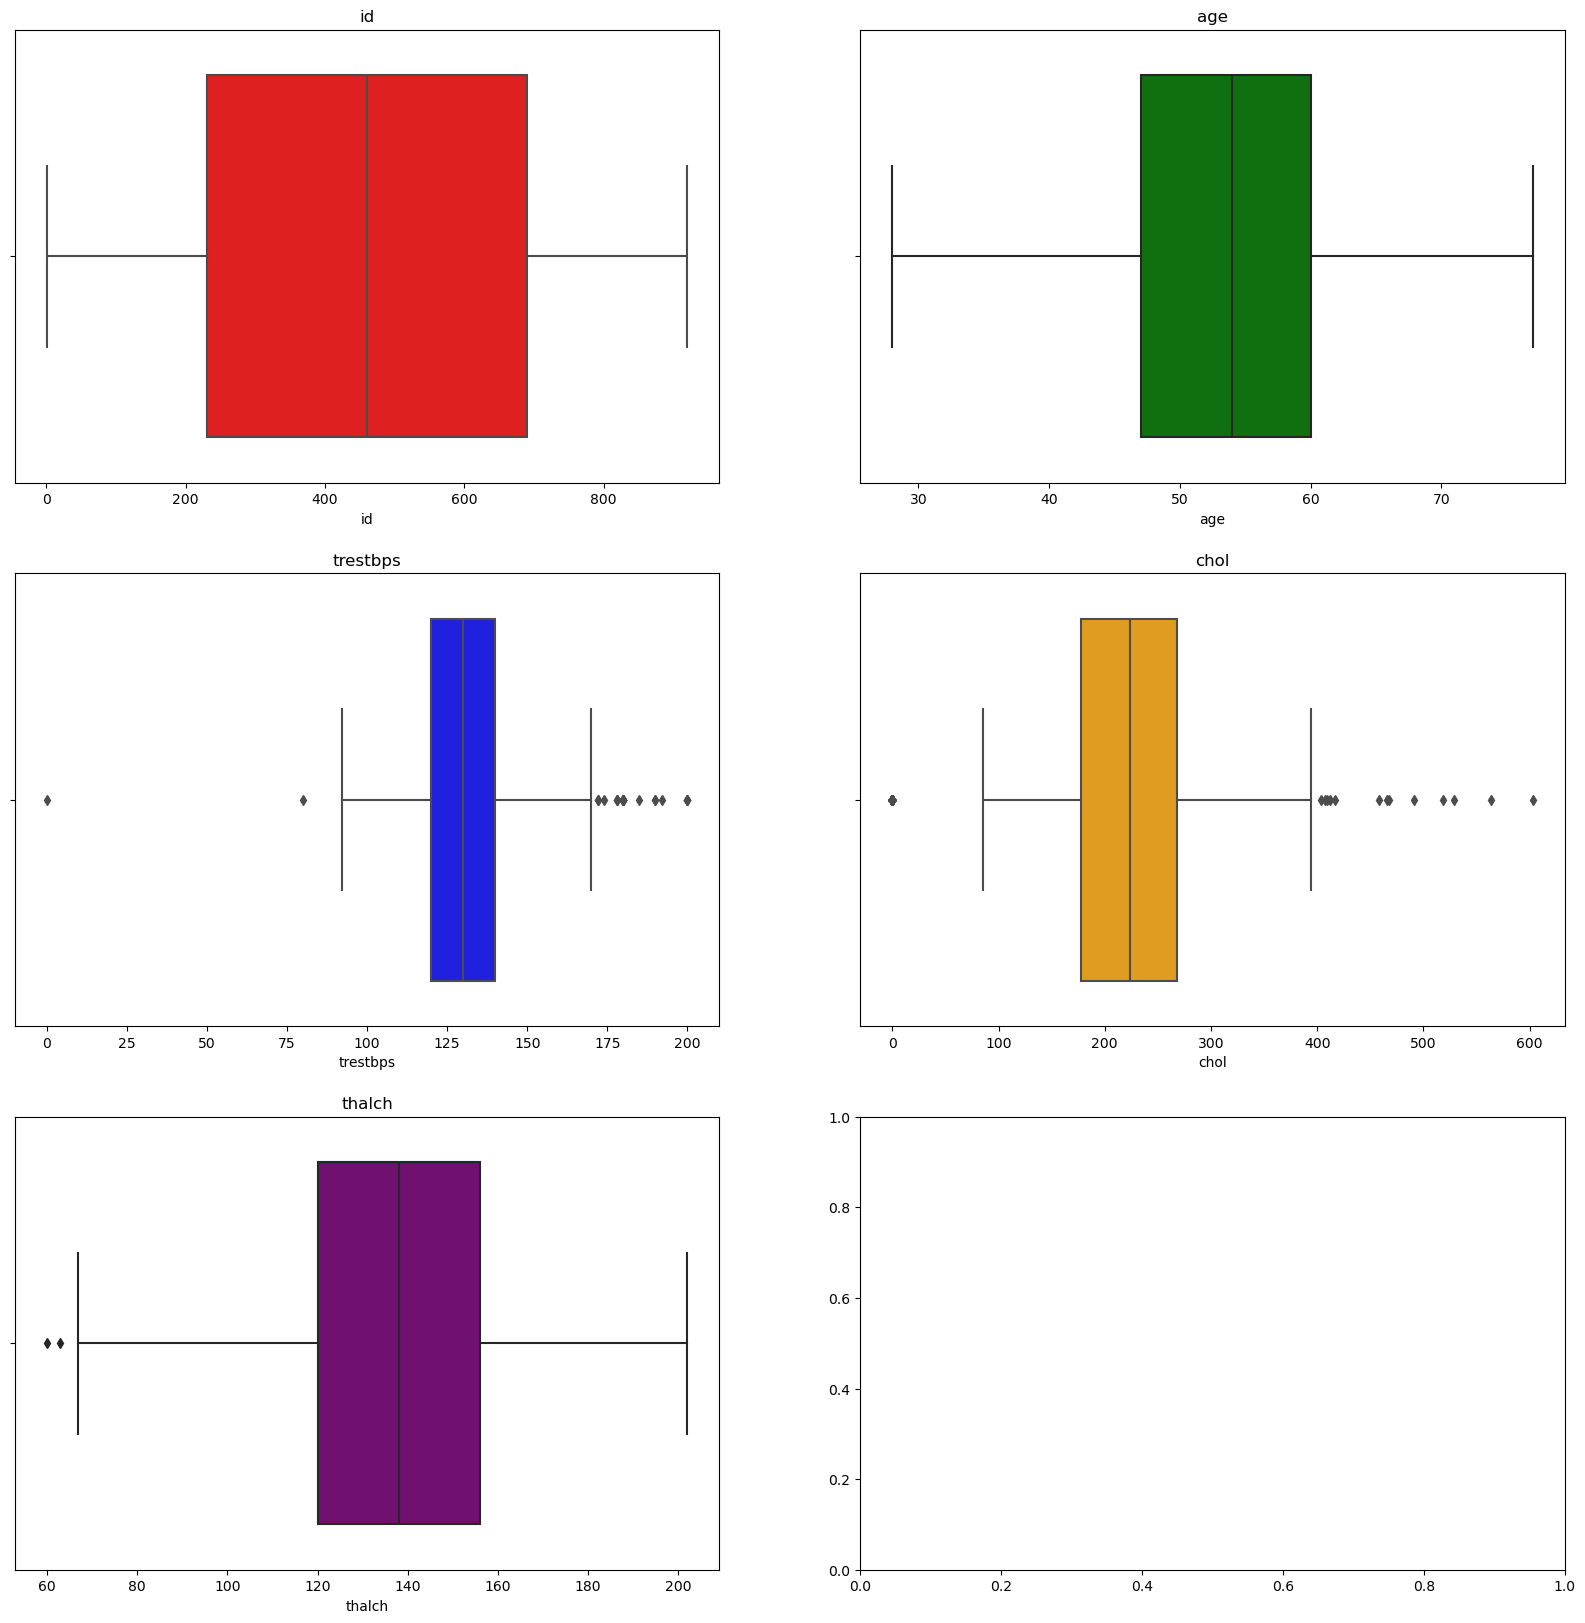

In [146]:
plt.figure(figsize=(20, 20))

color = ['red','green','blue', 'orange', 'purple']

for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i+1)  # Change the number of subplots to match the number of numerical columns
    sns.boxplot(x=df[col], color=color[i])
    plt.title(col)

plt.tight_layout()  # Add this line to adjust the spacing between subplots
plt.show()
    

In [ ]:
fig = px.box(df, y=numeric_col, color_discrete_sequence=color)
fig.update_layout(title= "Box plot for Numeric Columns", height=800, width=800)
fig.show()

In [ ]:
# make box plot of all the numeric columns using for loop and plotly one bye one column
fig= px.box(data_frame=df, y='age')
fig.show()

fig= px.box(data_frame=df, y='trestbps')
fig.show()

fig= px.box(data_frame=df, y='chol')
fig.show()

fig= px.box(data_frame=df, y='thalch')
fig.show()

fig= px.box(data_frame=df, y='oldpeak')
fig.show()


In [ ]:
# print the raq from df where tresrbps value is 0 
df[df['trestbps'] == 0]

# romove thi row from data 
df = df[df['trestbps'] != 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


<span style="color:yellow; font-weight:bold; font-size:250%;">Machine Learning
 </span>

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is `num` which is ths predicted attribute. We Will use this column to predict the heat disease.
The Unique values in this column are: [0, 1 2, 3, 4], which states that there are 5 type Heart disease.


*` 0 =  no heart disease`
*` 1 = mild heart disease` 
*` 2 = moderate heart disease` 
* `3 = sever heart disease`
* `4 = critical heart disease`

In [ ]:
# split the data into X and y 
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical column and save it for inverse Transform
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




Enlist all the models that you will use to predict the heart disease. These
model should be classifier for multi-class classification 

1. Logistic regression 
2. KNN
3. NB
4. SVM
5. Decision tree 
6. Random Forest 
7. XGBoodt
8. GradientBosst classifier
9. AdaBoost
10. LightGBM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import  GaussianNB
# from lightgbm import  LGBMClassifier 
# import pipeline 
from sklearn.pipeline import Pipeline

# import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('K Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())


]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6802721088435374
Test Accuracy: 0.6630434782608695

Model: Gradient Boosting
Cross-validation Accuracy: 0.672108843537415
Test Accuracy: 0.6793478260869565

Model: Support Vector Machine
Cross-validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-validation Accuracy: 0.5251700680272109
Test Accuracy: 0.5108695652173914

Model: Decision Tree
Cross-validation Accuracy: 0.6081632653061224
Test Accuracy: 0.6902173913043478

Model: Ada Boost
Cross-validation Accuracy: 0.6231292517006803
Test Accuracy: 0.5978260869565217

Model: XGBoost
Cross-validation Accuracy: 0.6544217687074829
Test Accuracy: 0.657608695652174

Model: K Nearest Neighbors
Cross-validation Accuracy: 0.5836734693877551
Test Accuracy: 0.5978260869565217

Model: Naive Bayes
Cross-validation Accuracy: 0.5836734693877552
Test Accuracy: 0.5543478260869565

Best Model: Pipeline(steps=[('model', DecisionTreeClassifier(random_stat

#### Outputs:
1. Thm minium age to have a heart disease starts from 28 Years old.
2. Most of the pople get heart disease at the age 54-55 years
3. Most of the male and female get are with heart disease at the age 54-55 years.
4. The percentage of males is 21.09%
5. The percentage of females is 78.91%
6. The difference between male and female 57.83%
7. we have highest number of people from cleveland (304) and lowest from Switzerland (123)
   1. The highest number of female in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of male in the dataset are from Hungary (212) and lowest from Swizerland (113).
   3. 
8. The percentage difference in Age column for each Dataset group is 13.48%
9. `write down the observation here about Mean, Median, Mode of age column, grouped by dataset column.`


10. `write down the observation from cp column here`
11. `How did you deal with outliers write the information step by step`
12. `write down the observation from model output `.

